# 06.01 Monte Carlo

The idea of a *model* that models the data is not obvious to everyone.
Let us start slow and build a model not of some complicated data
but of a mathematical curiosity that many of us saw in school.
We will use the Monte Carlo technique to model a part of the circle,
and in the process find an approximation to the value of $\pi$.

The idea of the Monte Carlo technique consists of measuring random points in a search space
and then take out conclusions from the measured points.  The bigger number of random points
the more likely we are to an exact solution.  In other words, the method *converges* on a solution.

![Monte Carlo](skl-monte-carlo.svg)

<div style="text-align:right;"><sup>skl-monte-carlo.svg</sup></div>

<div style="border: 0.3em double teal; border-radius: 0.5em; padding: 0.5em;">
Above we can see Monte Carlo, on the coast of Monaco.
The entire country of Monaco is composed of the city of Monaco,
Monte Carlo happens to be a small administrative region of the city.
In the past Monaco was divided into (very clustered) municipalities
and Monte Carlo had a city status.
</div>

That said the Monte Carlo technique was not created in Monte Carlo,
it was conceived around the early computing and nuclear programmes in the US.
The technique was named after the Monte Carlo municipality because of its Casinos,
which make for a good analogy against the heavy use of randomness in the technique.

We will play with NumPy to build a Monte Carlo method to solve
the classical problem of estimating the value of $\pi$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

We can estimate the value of $\pi$ using the *euclidean distance* between the origin
and the radius of a circle centered on the origin.  This comes straight from Pythagoras.
The square of the hypotenuse is equal to the sum of squares of the other two sides;
or the distance of the origin to a point in the plane is the square root of the sum
pf the square of its coordinates.

$$h^2 = a^2 + b^2 \Leftrightarrow d = \sqrt{x^2 + y^2}$$

If a point is inside the circle, then the distance will smaller then the radius, otherwise
it will be bigger.  We will use a circle or radius $1$, since that is the basic trigonometric circle.
The argument to our estimator is the number of points used.
A circle of radius $1$ -  a unit circle - has several useful properties.
For example, the perimeter of the circle is $2\pi$
and the area of the unit circle is $\pi$.

![Euclidean Geometry of Pi](skl-pi-euclid.svg)

<div style="text-align:right;"><sup>skl-pi-euclid.svg</sup></div>

Working with the full unit circle is a tad annoying because we need to deal
with negative values.
We will need to generate random values and, as we saw,
the random number generating functions spit numbers
between $0$ and $1$, which are positive.

Instead of the full circle we can work with one quadrant of the unit circle.
And since the circle has $4$ quadrants, the area of one quadrant is $\pi/4$.
The $1st$ quadrant is composed of values in the positive area of both axes.
And moreover, the $1st$ quadrant fits inside a square of values $0$ to $1$ on both axes,
a shape in which all raw random values will appear.
The area of this square is $1$ since all its sides are $1$.

![Estimating Pi](skl-pi-area.svg)

<div style="text-align:right;"><sup>skl-pi-area.svg</sup></div>

If we generate lots of random points inside the square,
we will have points that fall inside or outside the quadrant of the circle.
The ratio between the area of the quadrant and the square tells us
how much of the square the quadrant occupies.
And since the square has area $1$,
that ratio is the value of the area of the quadrant.
We know that the are of the quadrant is $\pi/4$,
hence the value of $\pi$ is just $4$ times the ratio between the area
of the quadrant and the square.

We will approximate the area of the square by the number of points
that fall in the square.
All the points we generate fall in the square hence the estimate is all points.
The area of the quadrant will then be the number of points inside the quadrant.
Which points are inside the quadrant can be determined by euclidean distance.
Since the radius from the origin is $1$,
any point closer than that to the origin is inside the quadrant.

Note that we do not really need the square root in our equation
since the square root of any value bigger that $1$ is still bigger than $1$,
and the square root of any number smaller than $1$ is still smaller than $1$.
We will keep the square root for readability here
but in a real implementation one would do away with it.
This concept of making away with the square root when comparing distances
will come back, and it is a very common idea in mathematical programming.

3.16

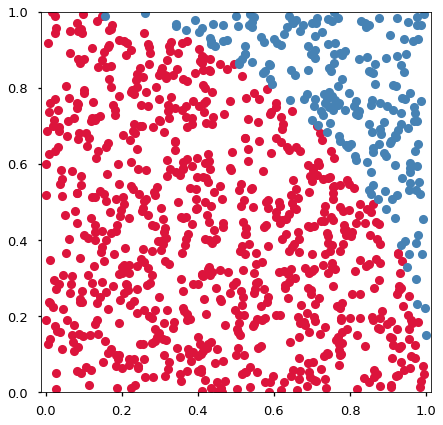

In [2]:
def approx_pi(n=1000, plot=False):
    points = np.random.rand(n, 2)
    result = np.sqrt(points[:, 0]**2 + points[:, 1]**2) < 1.0
    pi = 4 * (result.sum() /  n)
    if plot:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.plot(points[result, 0], points[result, 1], 'o', color='crimson')
        ax.plot(points[~result, 0], points[~result, 1], 'o', color='steelblue')
        ax.axis('equal')
        ax.axis([0, 1, 0, 1])
    return pi


approx_pi(plot=True)

Kind of fuzzy, and $\pi$ is quite off too.
But we only tried a thousand points.
We shall try more.

The more points one attempts in a Monte Carlo method the better
the approximation one will get.
Yet, the more points so does the computational cost increases.
With a million points.

3.14236

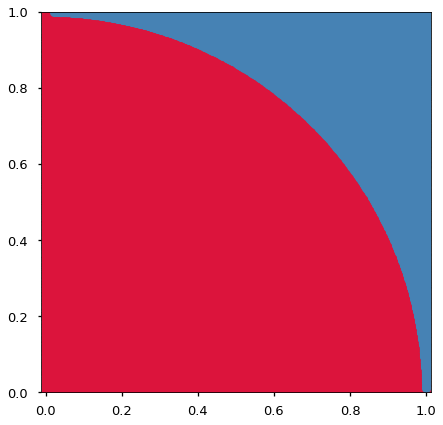

In [3]:
approx_pi(10**6, plot=True)

Hmmm... but that is still a tag off.
NumPy itself has a good approximation of $\pi$.

In [4]:
np.pi

3.141592653589793

Let's try our function in a loop,
i.e. we approximate several times with more and more random points..

In [5]:
for i in range(7):
    print(10**i, approx_pi(10**i))

1 4.0
10 2.8
100 3.2
1000 3.22
10000 3.1428
100000 3.14336
1000000 3.14316


And the more points we use the better the approximation is.
This is because Monte Carlo is a **brute force** algorithm,
one can try more and more points to try to find a solution.
The computational cost becomes expensive very fast with such algorithms.

But is Monte Carlo Machine Learning?

**No**.
Monte Carlo is an optimization technique that *may* be used as part
of a machine learning algorithm but is not an ML technique in itself.
In ML we are working with data,
in the example we worked here - as useful as approximating $\pi$ is -
there is no data from which we build a model.
All we did here was some mathematical play.

An ML technique is an algorithm on top of data,
an algorithm that will use an optimization algorithm
as part of it but will do more than that.
An ML technique will encode data in order to run an
optimization on top of it, perform the optimization,
and organize the results so the optimization output
can be used on new data.